<a href="https://colab.research.google.com/github/wddyzxxx/Machine-Learning-Python-code/blob/main/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/content/drive/MyDrive/Machine_Learning/ex2/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

# data1=normalization(data.iloc[:,0:2])
# data2=data.iloc[:,2]
# data=pd.concat([data1, data2], axis=1)
data.head()

Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

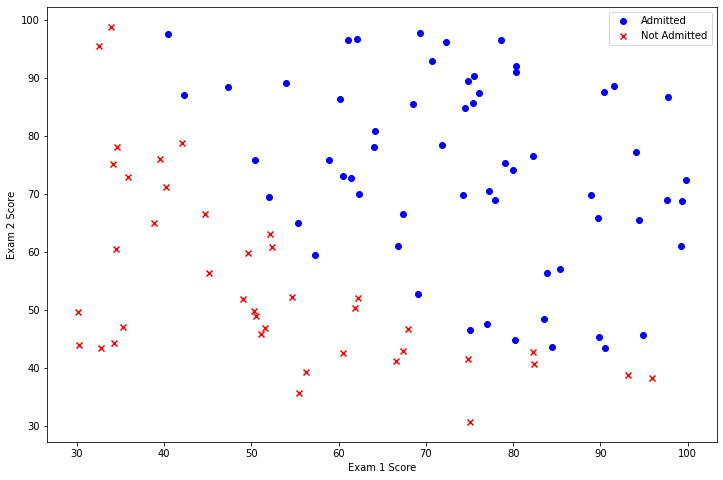

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'],  c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'],  c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [100]:
X=np.array(data)[:,0:2]

In [99]:
ones=np.ones(len(X))
X=np.insert(X,0,ones,1)
X

array([[ 1.       ,  1.       ,  1.       ,  0.051267 ,  0.69956  ],
       [ 1.       ,  1.       ,  1.       , -0.092742 ,  0.68494  ],
       [ 1.       ,  1.       ,  1.       , -0.21371  ,  0.69225  ],
       [ 1.       ,  1.       ,  1.       , -0.375    ,  0.50219  ],
       [ 1.       ,  1.       ,  1.       , -0.51325  ,  0.46564  ],
       [ 1.       ,  1.       ,  1.       , -0.52477  ,  0.2098   ],
       [ 1.       ,  1.       ,  1.       , -0.39804  ,  0.034357 ],
       [ 1.       ,  1.       ,  1.       , -0.30588  , -0.19225  ],
       [ 1.       ,  1.       ,  1.       ,  0.016705 , -0.40424  ],
       [ 1.       ,  1.       ,  1.       ,  0.13191  , -0.51389  ],
       [ 1.       ,  1.       ,  1.       ,  0.38537  , -0.56506  ],
       [ 1.       ,  1.       ,  1.       ,  0.52938  , -0.5212   ],
       [ 1.       ,  1.       ,  1.       ,  0.63882  , -0.24342  ],
       [ 1.       ,  1.       ,  1.       ,  0.73675  , -0.18494  ],
       [ 1.       ,  1.       ,  1

In [6]:
Y=np.array(data)[:,2].reshape(len(X),1)
Y

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [17]:
theta=np.zeros((3,1))

In [18]:
X.shape, theta.shape, Y.shape,type(X),type(Y),type(theta)

((100, 3), (3, 1), (100, 1), numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [280]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [20]:
epsilon=1e-5
def Cost(X,Y,theta):
  yp=Sigmoid(X.dot(theta))
  first= -Y*np.log(yp+epsilon)
  second= (1-Y)*np.log(1-yp+epsilon)
  result=np.sum(first-second)/len(X)
  return result

In [21]:
Cost(X,Y,theta)

0.6931271807599428

In [22]:
def GD(X,Y,theta,alpha,iters):
  temp=np.zeros_like(theta)
  cost=np.zeros(iters)
  epsilon=1e-5
  cost[0]=Cost(X,Y,theta)
  for i in range(iters):
    error=Sigmoid(X.dot(theta))-Y
    theta=theta-(alpha/len(X))*X.T.dot(error)
    cost[i]=Cost(X,Y,theta)
  return theta,cost

In [70]:
theta=np.zeros((3,1))
theta

array([[0.],
       [0.],
       [0.]])

In [71]:
alpha=0.004
iters=1000000

In [72]:
theta,b=GD(X,Y,theta,alpha,iters)
# para1 = - theta_final[0,0] / theta_final[2,0]
# para2 = - theta_final[1,0] / theta_final[2,0]

In [73]:
theta,b[0],b[-1]

(array([[-24.70895819],
        [  0.20261344],
        [  0.19781107]]), 1.9879301025091376, 0.20351428547299066)

In [74]:
x=range(iters)
y=b
plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.show

<function matplotlib.pyplot.show>

In [75]:
b[-1]

0.20351428547299066

In [76]:
#@title
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = ( - theta[0][0] - theta[1][0] * plotting_x1) / theta[2][0]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [77]:
def predict(theta,X):
  return Sigmoid(np.dot(X,theta))
predict(theta,[1,60,60])

array([0.3354833])

In [78]:
def probability(X,theta):
  probability=Sigmoid(np.dot(X,theta))
  return [1 if x >= 0.5 else 0 for x in probability]
  # return (1 if x >= 0.5 else 0 for x in probability) 生成的是迭代器

In [79]:
A=np.array(probability(X,theta)).reshape(100,1)
A.shape

(100, 1)

In [81]:
B=Y
B.shape

(100, 1)

In [82]:
num=(A==B)
sum(num)

array([89])

In [ ]:
##########进行正则化实践

In [273]:
path =  '/content/drive/MyDrive/Machine_Learning/ex2/ex2data2.txt'
data_init = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data_init.head()

Test 1   Test 2  Accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1

In [274]:
positive2 = data_init[data_init['Accepted'].isin([1])]
negative2 = data_init[data_init['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [275]:
degree = 6
data2 = data_init
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree+1):
    for j in range(0, i+1):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
#此处原答案错误较多，已经更正

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

Accepted  Ones       F10      F01       F20       F11       F02       F30  \
0         1     1  0.051267  0.69956  0.002628  0.035864  0.489384  0.000135   
1         1     1 -0.092742  0.68494  0.008601 -0.063523  0.469143 -0.000798   
2         1     1 -0.213710  0.69225  0.045672 -0.147941  0.479210 -0.009761   
3         1     1 -0.375000  0.50219  0.140625 -0.188321  0.252195 -0.052734   
4         1     1 -0.513250  0.46564  0.263426 -0.238990  0.216821 -0.135203   

        F21       F12  ...       F23       F14       F05           F60  \
0  0.001839  0.025089  ...  0.000900  0.012278  0.167542  1.815630e-08   
1  0.005891 -0.043509  ...  0.002764 -0.020412  0.150752  6.362953e-07   
2  0.031616 -0.102412  ...  0.015151 -0.049077  0.158970  9.526844e-05   
3  0.070620 -0.094573  ...  0.017810 -0.023851  0.031940  2.780914e-03   
4  0.122661 -0.111283  ...  0.026596 -0.024128  0.021890  1.827990e-02   

            F51       F42       F33       F24       F15       F06  
0  2.477505e-07  0.000003  0.000046  0.000629  0.008589  0.117206  
1 -4.699318e-06  0.000035 -0.000256  0.001893 -0.013981  0.103256  
2 -3.085938e-04  0.001000 -0.003238  0.010488 -0.033973  0.110047  
3 -3.724126e-03  0.004987 -0.006679  0.008944 -0.011978  0.016040  
4 -1.658422e-02  0.015046 -0.013650  0.012384 -0.011235  0.010193  

[5 rows x 29 columns]

In [276]:
# 实现正则化的代价函数
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

In [277]:
# 实现正则化的梯度函数
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [278]:
# 初始化X，y，θ
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]
theta2 = np.zeros(cols-1)

# 进行类型转换
X2 = np.array(X2.values)
y2 = np.array(y2.values)

# λ设为1
learningRate = 1

In [281]:
# 计算初始代价
costReg(theta2, X2, y2, learningRate)

0.6931471805599454

In [262]:
learningRate=1
costReg(theta, X, y, learningRate)

0.6931271807599427

In [282]:
import scipy.optimize as opt
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
        -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516292,
        -1.4581701 , -0.05098418, -0.61558552, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603297, -0.04466178, -0.27778952, -0.29539514,
        -0.45645982, -1.04319155,  0.02779373, -0.29244872,  0.01555761,
        -0.32742406, -0.1438915 , -0.92467487]), 32, 1)

In [284]:
def hfunc2(theta, x1, x2):
    temp = theta[0][0]
    place = 0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp+= np.power(x1, i-j) * np.power(x2, j) * theta[0][place+1]
            place+=1
    return temp

In [285]:
def find_decision_boundary(theta):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = hfunc2(theta, h_val['x1'], h_val['x2'])

    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2

In [286]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result2)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()

In [287]:
learningRate2 = 0
result3 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate2))

In [288]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result3)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()

In [289]:
learningRate3 = 100
result4 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate3))

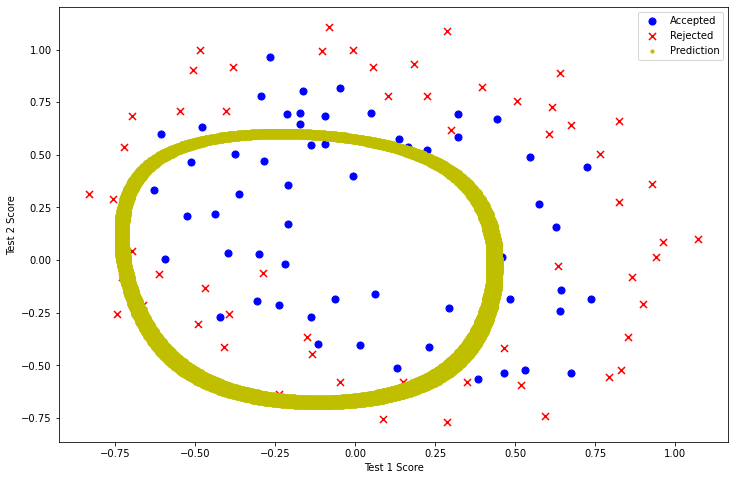

In [290]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result4)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()